# Project Work - Tessa Vogt
## Description:
Although mental health awareness has grown in recent years, societal acceptance of mental illnesses persists. Since 2000, the World Health Organization (WHO) has collected comprehensive health data, which has been published on its website since 2005. In 2022, the WHO released a global dataset on suicide rates that includes data from 169 countries. It provides the basis for a better understanding of suicidal actions, may lead to global exploration for potential influencing factors and provide data upon which preventive measures can be developed. In this study it is sought to find associations between suicide rates and a variety of variables, including economic conditions, demographic characteristics, and the availability of health care. The emphasis is on categorizing suicide rates by gender and age group, as well as a thorough examination of the country with the highest suicide rate. The methodology consists in cleaning, preparing and analyzing data considering regional and income differences as well as gender-specific and age-related aspects. The findings show that suicide rates vary significantly by region, income, and gender, with men and the elderly being particularly affected above average. The study of countries with the highest suicide rates focuses on Lesotho, which is particularly affected due to its poor healthcare system and high unemployment. <br>
<br>
This is the corresponding Jupyter Notebook for the analysis of the WHO Suicide Rates Dataset and the paper "Global Suicide Rates: A Statistical Investigation of Trends and Influences Using WHO Mortality Data (2000-2019)" by Tessa Vogt.

## Implementation:

### Import Dataset to Database:
In this script, a connection to the PostgreSQL database is first established. Afterwards, existing tables and enum types will be deleted, and new enum types will be created to define standardized values for certain fields. The deletion of existing tables and enum types, as well as the creation of new enum types, serves to update the structure of the database and ensure that only certain predefined values can be stored in specific fields of the table. This brings advantages such as data integrity and more efficient data processing. Subsequently, a new table `suicide_data` will be created that uses these enums and stores data on suicide rates. The data is then imported from a CSV file into this table, with empty numeric fields replaced by question marks. Replacing empty numeric fields with question marks prevents errors and ensures a consistent representation of missing values in the database. This ensures data integrity and facilitates later processing. Finally, the data in the table is verified by outputting the first three ID values and the total number of entries. This review includes errors such as incorrect ID assignment and excessive data reading.

In [2]:
# used labraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

In [3]:
# connect to database
try:
    conn = psycopg2.connect("dbname='postgres' user='postgres' host='localhost' password='pass1234'")
    print('Successfully connected to the database')
except Exception as e:
    print('Unable to connect to the database:', e)

cursor = conn.cursor()

Successfully connected to the database


In [4]:
# CREATE ENUMS
cursor.execute("""DROP TABLE IF EXISTS suicide_data
               """)
conn.commit()
cursor.execute("""DROP TYPE IF EXISTS ind_uuid_enum;
               DROP TYPE IF EXISTS ind_name_enum;
               DROP TYPE IF EXISTS ind_code_enum;
               DROP TYPE IF EXISTS geo_name_short_enum;
               DROP TYPE IF EXISTS dim_time_enum;
               DROP TYPE IF EXISTS dim_time_type_enum;
               DROP TYPE IF EXISTS dim_sex_enum;
               DROP TYPE IF EXISTS dim_age_enum;
               DROP TYPE IF EXISTS dim_value_type_enum;
               DROP TYPE IF EXISTS dim_publish_state_code_enum;
               """)
conn.commit()
try: 
    cursor.execute("""CREATE TYPE ind_uuid_enum AS ENUM('16BBF41', '?');
                        CREATE TYPE ind_name_enum AS ENUM('Suicide deaths', '?');
                        CREATE TYPE ind_code_enum AS ENUM('SDGSUICIDE', '?');
                        CREATE TYPE geo_name_short_enum AS ENUM('Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'CÃ´te d''Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic People''s Republic of Korea', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Eastern Mediterranean', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'High-income economies', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lao People''s Democratic Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Low-income economies', 'Lower-middle-income economies', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands (Kingdom of the)', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South-East Asia', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'TÃ¼rkiye', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Upper-middle-income economies', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Pacific', 'World', 'Yemen', 'Zambia', 'Zimbabwe', '?');
                        CREATE TYPE dim_time_enum AS ENUM('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '?');
                        CREATE TYPE dim_time_type_enum AS ENUM('YEAR', '?');
                        CREATE TYPE dim_sex_enum AS ENUM('Female', 'Male', 'Total', '?');
                        CREATE TYPE dim_age_enum AS ENUM('Total years','15 to 19 years', '15 to 24 years','15 to 29 years','25 to 34 years','30 to 49 years','35 to 44 years','45 to 54 years', '55 to 64 years', '65 to 74 years','75 to 84 years', '85 plus years', '?');
                        CREATE TYPE dim_value_type_enum AS ENUM('RATE_PER_100000', '?');
                        CREATE TYPE dim_publish_state_code_enum AS ENUM('PUBLISHED', '?');
                   """)
    conn.commit()
    print("ENUMS added correctfully")
except Exception as e:
    # if the transaction aborts we will need to rollback
    cursor.execute("ROLLBACK")
    print(e)


# CREATE TABLE
try:
    cursor.execute("""CREATE TABLE IF NOT EXISTS suicide_data (
                        id SERIAL PRIMARY KEY,
                        ind_uuid ind_uuid_enum,
                        ind_name ind_name_enum,
                        ind_code ind_code_enum,
                        dim_geo_code_m49 INTEGER,
                        geo_name_short geo_name_short_enum,
                        dim_time dim_time_enum,
                        dim_time_type dim_time_type_enum,
                        dim_sex dim_sex_enum,
                        dim_age dim_age_enum,
                        dim_value_type dim_value_type_enum,
                        value_numeric NUMERIC,
                        value_numeric_lower NUMERIC,
                        value_numeric_upper NUMERIC,
                        dim_publish_state_code dim_publish_state_code_enum)""")
    conn.commit()
    print("TABLE suicide_data added correctfully")
except Exception as e:
    cursor.execute("ROLLBACK")
    print('Error creating table:', e)

ENUMS added correctfully
TABLE suicide_data added correctfully


In [5]:
# write data into database
with open('16BBF41_ALL_LATEST.csv', 'r') as f:
    next(f)

    try:
        # Continue processing the file from the second line
        for line in f:
            # Split the line into values
            values = line.split(',')

            # Replace empty numeric values with '?'
            for i in range(len(values)):
                if i >= 10 and i <= 13:  # Numeric columns start from index 10
                    values[i] = '?' if not values[i].strip() else values[i]

            # Join the values back into a line
            line = ','.join(values)

            # Use the correct order of columns in the COPY command
            cursor.copy_from(StringIO(line), 'suicide_data', columns=(
                'ind_uuid', 'ind_name', 'ind_code', 'dim_geo_code_m49', 'geo_name_short',
                'dim_time', 'dim_time_type', 'dim_sex', 'dim_age', 'dim_value_type',
                'value_numeric', 'value_numeric_lower', 'value_numeric_upper',
                'dim_publish_state_code'), sep=',', null='?')
            
        print('data added to database correctfully')
    except Exception as e:
        cursor.execute("ROLLBACK")
        print(e)


data added to database correctfully


In [6]:
# CHECK DATA
cursor.execute("""SELECT id FROM suicide_data""")
rows = cursor.fetchall()
print("ID-Row of suicide_data (first 3 values):", rows[0:3])

# Get the number of entries
entry_count = len(rows)
print("Number of entries in suicide_data:", entry_count)

ID-Row of suicide_data (first 3 values): [(1,), (2,), (3,)]
Number of entries in suicide_data: 17679


### Explore Database:
To familiarize oneself with the PostgreSQL database `suicide_data`, an overview of the dataset will first be taken. First, the number of missing values (`NULL`) in each column is checked. Subsequently, the occurrences of the datasets will be counted by countries, income groups, regions, age groups, years, and gender, and this information will be presented in an organized manner. In this process, the distribution of the data across different categories is determined and presented.

In [7]:
#MISSING VALUES
# Check for NULL values in each column
cursor.execute("""SELECT
        COUNT(CASE WHEN ind_uuid IS NULL THEN 1 END) AS null_ind_uuid_count,
        COUNT(CASE WHEN ind_name IS NULL THEN 1 END) AS null_ind_name_count,
        COUNT(CASE WHEN ind_code IS NULL THEN 1 END) AS null_ind_code_count,
        COUNT(CASE WHEN dim_geo_code_m49 IS NULL THEN 1 END) AS null_dim_geo_code_m49_count,
        COUNT(CASE WHEN geo_name_short IS NULL THEN 1 END) AS null_geo_name_short_count,
        COUNT(CASE WHEN dim_time IS NULL THEN 1 END) AS null_dim_time_count,
        COUNT(CASE WHEN dim_time_type IS NULL THEN 1 END) AS null_dim_time_type_count,
        COUNT(CASE WHEN dim_sex IS NULL THEN 1 END) AS null_dim_sex_count,
        COUNT(CASE WHEN dim_age IS NULL THEN 1 END) AS null_dim_age_count,
        COUNT(CASE WHEN dim_value_type IS NULL THEN 1 END) AS null_dim_value_type_count,
        COUNT(CASE WHEN value_numeric IS NULL THEN 1 END) AS null_value_numeric_count,
        COUNT(CASE WHEN value_numeric_lower IS NULL THEN 1 END) AS null_value_numeric_lower_count,
        COUNT(CASE WHEN value_numeric_upper IS NULL THEN 1 END) AS null_value_numeric_upper_count,
        COUNT(CASE WHEN dim_publish_state_code IS NULL THEN 1 END) AS null_dim_publish_state_code_count
    FROM suicide_data
""")
null_counts = cursor.fetchone()

# Display or process the counts
print("Number of undefined values in each column:")
print("ind_uuid:", null_counts[0])
print("ind_name:", null_counts[1])
print("ind_code:", null_counts[2])
print("dim_geo_code_m49:", null_counts[3])
print("geo_name_short:", null_counts[4])
print("dim_time:", null_counts[5])
print("dim_time_type:", null_counts[6])
print("dim_sex:", null_counts[7])
print("dim_age:", null_counts[8])
print("dim_value_type:", null_counts[9])
print("value_numeric:", null_counts[10])
print("value_numeric_lower:", null_counts[11])
print("value_numeric_upper:", null_counts[12])
print("dim_publish_state_code:", null_counts[13])


Number of undefined values in each column:
ind_uuid: 0
ind_name: 0
ind_code: 0
dim_geo_code_m49: 0
geo_name_short: 0
dim_time: 0
dim_time_type: 0
dim_sex: 0
dim_age: 0
dim_value_type: 0
value_numeric: 0
value_numeric_lower: 6039
value_numeric_upper: 6039
dim_publish_state_code: 0


In [8]:
# Get count of occurrences for each country and order by geo_name_short
cursor.execute("""
    SELECT geo_name_short, COUNT(*) 
    FROM suicide_data 
    GROUP BY geo_name_short 
    ORDER BY geo_name_short
""")
country_counts = cursor.fetchall()

print("\nCount of Occurrences for Each Country (Ordered by Name):")
for country_count in country_counts:
    print(f"{country_count[0]}: {country_count[1]}")



Count of Occurrences for Each Country (Ordered by Name):
Afghanistan: 93
Africa: 60
Albania: 93
Algeria: 93
Americas: 60
Angola: 93
Antigua and Barbuda: 93
Argentina: 93
Armenia: 93
Australia: 93
Austria: 93
Azerbaijan: 93
Bahamas: 93
Bahrain: 93
Bangladesh: 93
Barbados: 93
Belarus: 93
Belgium: 93
Belize: 93
Benin: 93
Bhutan: 93
Bolivia (Plurinational State of): 93
Bosnia and Herzegovina: 93
Botswana: 93
Brazil: 93
Brunei Darussalam: 93
Bulgaria: 93
Burkina Faso: 93
Burundi: 93
Cabo Verde: 93
Cambodia: 93
Cameroon: 93
Canada: 93
Central African Republic: 93
Chad: 93
Chile: 93
China: 93
Colombia: 93
Comoros: 93
Congo: 93
Costa Rica: 93
CÃ´te d'Ivoire: 93
Croatia: 93
Cuba: 93
Cyprus: 93
Czechia: 93
Democratic People's Republic of Korea: 93
Democratic Republic of the Congo: 93
Denmark: 93
Djibouti: 93
Dominican Republic: 93
Eastern Mediterranean: 60
Ecuador: 93
Egypt: 93
El Salvador: 93
Equatorial Guinea: 93
Eritrea: 93
Estonia: 93
Eswatini: 93
Ethiopia: 93
Europe: 60
Fiji: 93
Finland: 9

In [9]:
try:
    # Get count of occurrences for each income_group
    cursor.execute("""
        SELECT geo_name_short::text, COUNT(*) 
        FROM suicide_data 
        WHERE geo_name_short::text IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies')
        GROUP BY geo_name_short::text
    """)
    income_group_counts = cursor.fetchall()

    print("\nCount of Occurrences for Each Income Group:")
    for income_group_count in income_group_counts:
        print(f"{income_group_count[0]}: {income_group_count[1]}")

    # Get count of occurrences for each region
    cursor.execute("""
        SELECT geo_name_short::text, COUNT(*) 
        FROM suicide_data 
        WHERE geo_name_short::text IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        GROUP BY geo_name_short::text
    """)
    region_counts = cursor.fetchall()

    print("\nCount of Occurrences for Each Region:")
    for region_count in region_counts:
        print(f"{region_count[0]}: {region_count[1]}")

    # Get count of occurrences for each country (not in regions or income groups)
    cursor.execute("""
        SELECT geo_name_short::text, COUNT(*) 
        FROM suicide_data 
        WHERE geo_name_short::text NOT IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies', 'Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        GROUP BY geo_name_short::text
    """)
    country_counts = cursor.fetchall()

    print("\nCount of Occurrences for Each Country:")
    for country_count in country_counts:
        print(f"{country_count[0]}: {country_count[1]}")

    # Commit the transaction
    conn.commit()
except Exception as e:
    # Rollback if there's an exception
    conn.rollback()
    print(f"Error fetching counts: {e}")



Count of Occurrences for Each Income Group:
Lower-middle-income economies: 60
Upper-middle-income economies: 60
High-income economies: 60
Low-income economies: 60

Count of Occurrences for Each Region:
South-East Asia: 60
Western Pacific: 60
Americas: 60
World: 60
Eastern Mediterranean: 60
Africa: 60
Europe: 60

Count of Occurrences for Each Country:
Indonesia: 93
Bangladesh: 93
Iran (Islamic Republic of): 93
Brunei Darussalam: 93
Kiribati: 93
Cameroon: 93
Luxembourg: 93
Sweden: 93
Viet Nam: 93
Uganda: 93
Montenegro: 93
Jordan: 93
Syrian Arab Republic: 93
Dominican Republic: 93
Cambodia: 93
Ireland: 93
Singapore: 93
Papua New Guinea: 93
Sri Lanka: 93
Uzbekistan: 93
Portugal: 93
Finland: 93
Malta: 93
United Kingdom of Great Britain and Northern Ireland: 93
Colombia: 93
Albania: 93
Ukraine: 93
Saudi Arabia: 93
Grenada: 93
Sao Tome and Principe: 93
Cuba: 93
Latvia: 93
Kyrgyzstan: 93
Algeria: 93
France: 93
Slovakia: 93
Maldives: 93
Israel: 93
Djibouti: 93
Senegal: 93
Malaysia: 93
Kenya: 9

In [10]:

# Get count of occurrences for each age group
cursor.execute("""SELECT dim_age, COUNT(*) 
               FROM suicide_data 
               GROUP BY dim_age""")
age_group_counts = cursor.fetchall()
print("\nCount of Occurrences for Each Age Group:")
for age_group_count in age_group_counts:
    print(f"{age_group_count[0]}: {age_group_count[1]}")



Count of Occurrences for Each Age Group:
35 to 44 years: 549
15 to 19 years: 549
25 to 34 years: 549
Total years: 11640
45 to 54 years: 549
15 to 24 years: 549
30 to 49 years: 549
75 to 84 years: 549
15 to 29 years: 549
85 plus years: 549
55 to 64 years: 549
65 to 74 years: 549


In [11]:
# Get count of occurrences for each year
cursor.execute("""SELECT dim_time, COUNT(*) FROM suicide_data GROUP BY dim_time""")
year_counts = cursor.fetchall()
# Sort the year_counts by the year (year_count[0])
year_counts = sorted(year_counts, key=lambda x: x[0])
# print the sorted counts
print("\nCount of Occurrences for Each Year:")
for year_count in year_counts:
    print(f"{year_count[0]}: {year_count[1]}")


Count of Occurrences for Each Year:
2000: 582
2001: 582
2002: 582
2003: 582
2004: 582
2005: 582
2006: 582
2007: 582
2008: 582
2009: 582
2010: 582
2011: 582
2012: 582
2013: 582
2014: 582
2015: 582
2016: 582
2017: 582
2018: 582
2019: 6621


In [12]:
# Get count of occurrences for each gender
cursor.execute("""SELECT dim_sex, COUNT(*) FROM suicide_data GROUP BY dim_sex""")
gender_counts = cursor.fetchall()
print("\nCount of Occurrences for Each Gender:")
for gender_count in gender_counts:
    print(f"{gender_count[0]}: {gender_count[1]}")


Count of Occurrences for Each Gender:
Female: 5893
Total: 5893
Male: 5893


## Analyse Dataset:
In this section, the suicide rates will be analyzed based on various factors such as gender, age groups, regions, countries, and income groups. SQL queries are executed on the table suicide_data to calculate the average suicide rates per 100,000 inhabitants for various periods and categories. These results are then loaded into DataFrames and visualized.

1. Line plots to represent suicide rates by gender over the years. (2000–2019 und 2000–2018)

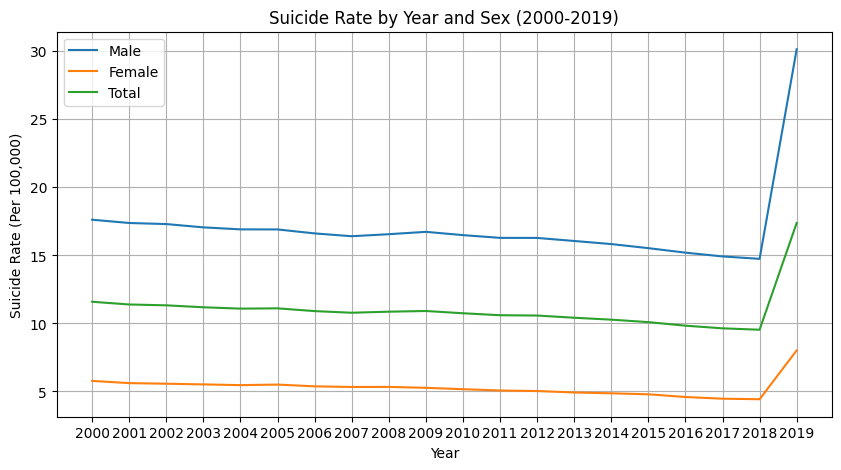

In [13]:
# SEX SUICIDE RATE FROM 2000 TO 2019
# Execute the query
cursor.execute("""
        SELECT dim_time, dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        GROUP BY dim_time, dim_sex
        ORDER BY dim_time, dim_sex
    """)

# Commit the transaction
conn.commit()

# Fetch the data into a DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Sex', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df = df.pivot(index='Year', columns='Sex', values='Avg_Numeric_Value')

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(pivot_df.index, pivot_df['Male'], label='Male')
plt.plot(pivot_df.index, pivot_df['Female'], label='Female')
plt.plot(pivot_df.index, pivot_df['Total'], label='Total')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate by Year and Sex (2000-2019)')
plt.legend()
plt.grid(True)
plt.show()

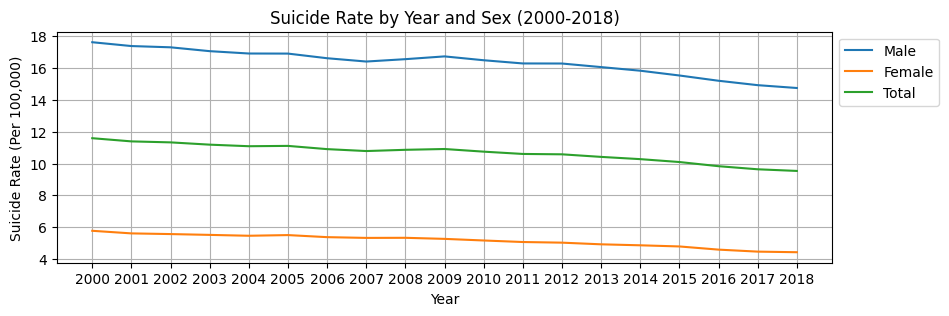

In [14]:
# SEX SUICIDE RATE FROM 2000 TO 2018
# Execute the query
cursor.execute("""
        SELECT dim_time, dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time NOT IN ('2019')
        GROUP BY dim_time, dim_sex
        ORDER BY dim_time, dim_sex
    """)

# Commit the transaction
conn.commit()

# Fetch the data into a DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Sex', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df = df.pivot(index='Year', columns='Sex', values='Avg_Numeric_Value')

# Plotting the line plot
plt.figure(figsize=(10, 3))
plt.plot(pivot_df.index, pivot_df['Male'], label='Male')
plt.plot(pivot_df.index, pivot_df['Female'], label='Female')
plt.plot(pivot_df.index, pivot_df['Total'], label='Total')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate by Year and Sex (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

2. Bar charts for visualizing suicide rates in 2019 by gender in comparison with other attributes like age groups, regions, and income groups.

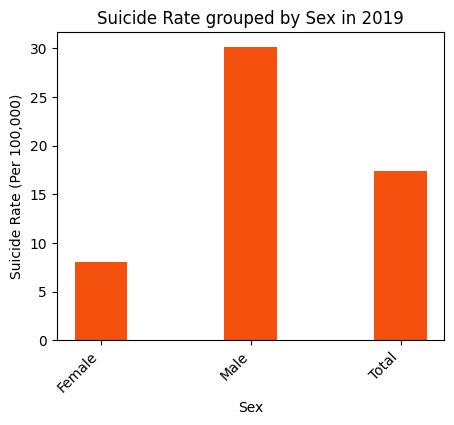

In [15]:
# SUICIDE RATES IN 2019 GROUPED BY SEX
cursor.execute("""
        SELECT dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time = '2019'
        GROUP BY dim_sex
        ORDER BY dim_sex
    """)

# Fetch the data into a DataFrame
df_sex_2019 = pd.DataFrame(cursor.fetchall(), columns=['Sex', 'Avg_Numeric_Value'])

# Plotting the bar chart
plt.figure(figsize=(5, 4))
plt.bar(df_sex_2019['Sex'], df_sex_2019['Avg_Numeric_Value'], color='#f3510d', width=0.35)
plt.xlabel('Sex')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate grouped by Sex in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

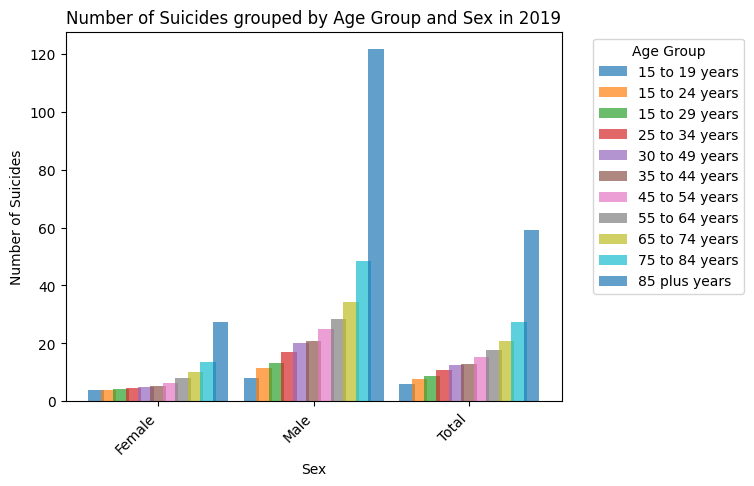

In [16]:
# SUICIDE RATES IN 2019 GROUPED BY AGE GROUP AND SEX
cursor.execute("""
        SELECT dim_age, dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time = '2019'
        AND dim_age NOT IN ('Total years')
        GROUP BY dim_age, dim_sex
        ORDER BY dim_age, dim_sex
    """)

# Fetch the data into a DataFrame
df_age_sex_2019 = pd.DataFrame(cursor.fetchall(), columns=['Age', 'Sex', 'Avg_Numeric_Value'])

# Create separate bars for each age group, Male, Female, and Total
fig, ax = plt.subplots()
age_groups = df_age_sex_2019['Age'].unique()
width = 0.2  # Width of the bars
offsets = np.linspace(-width*2, width*2, len(age_groups))

for i, age_group in enumerate(age_groups):
    df_age_group = df_age_sex_2019[df_age_sex_2019['Age'] == age_group]
    positions = np.arange(len(df_age_group['Sex'])) + offsets[i]  # Set positions for the bars
    ax.bar(positions, df_age_group['Avg_Numeric_Value'], width/2, label=age_group, alpha=0.7)

ax.set_xlabel('Sex')
ax.set_ylabel('Number of Suicides')
ax.set_title('Number of Suicides grouped by Age Group and Sex in 2019')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust axis ticks and labels
ax.set_xticks(np.arange(len(df_age_group['Sex'])))
ax.set_xticklabels(df_age_group['Sex'])
plt.xticks(rotation=45, ha='right')

plt.show()


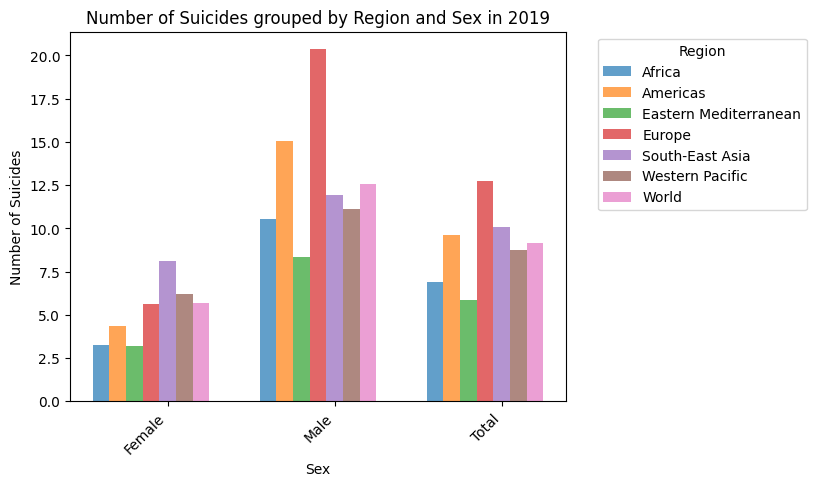

In [17]:
# SUICIDE RATES IN 2019 GROUPED BY AGE GROUP AND SEX
cursor.execute("""
        SELECT geo_name_short, dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time = '2019'
        AND geo_name_short IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        GROUP BY geo_name_short, dim_sex
        ORDER BY geo_name_short, dim_sex
    """)

# Fetch the data into a DataFrame
df_region_sex_2019 = pd.DataFrame(cursor.fetchall(), columns=['Region', 'Sex', 'Avg_Numeric_Value'])

# Create separate bars for each age group, Male, Female, and Total
fig, ax = plt.subplots()
regions = df_region_sex_2019['Region'].unique()
width = 0.2  # Width of the bars
offsets = np.linspace(-width*2, width*3, len(age_groups))

for i, region in enumerate(regions):
    df_region = df_region_sex_2019[df_region_sex_2019['Region'] == region]
    positions = np.arange(len(df_region['Sex'])) + offsets[i]  # Set positions for the bars
    ax.bar(positions, df_region['Avg_Numeric_Value'], width/2, label=region, alpha=0.7)

ax.set_xlabel('Sex')
ax.set_ylabel('Number of Suicides')
ax.set_title('Number of Suicides grouped by Region and Sex in 2019')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust axis ticks and labels
ax.set_xticks(np.arange(len(df_age_group['Sex'])))
ax.set_xticklabels(df_age_group['Sex'])
plt.xticks(rotation=45, ha='right')

plt.show()


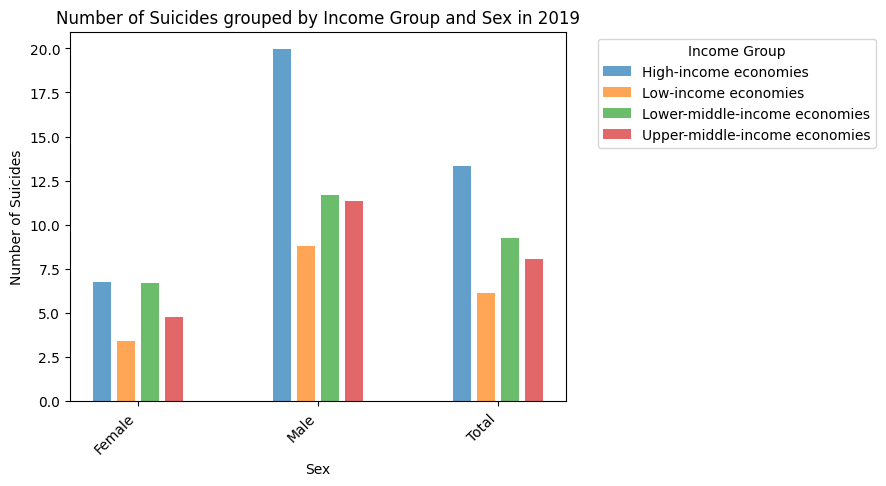

In [18]:
# SUICIDE RATES IN 2019 GROUPED BY AGE GROUP AND SEX
cursor.execute("""
        SELECT geo_name_short, dim_sex, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time = '2019'
        AND geo_name_short IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies')
        GROUP BY geo_name_short, dim_sex
        ORDER BY geo_name_short, dim_sex
    """)

# Fetch the data into a DataFrame
df_income_sex_2019 = pd.DataFrame(cursor.fetchall(), columns=['Income', 'Sex', 'Avg_Numeric_Value'])

# Create separate bars for each age group, Male, Female, and Total
fig, ax = plt.subplots()
income_groups = df_income_sex_2019['Income'].unique()
width = 0.2  # Width of the bars
offsets = np.linspace(-width, width, len(income_groups))

for i, income_group in enumerate(income_groups):
    df_income_group = df_income_sex_2019[df_income_sex_2019['Income'] == income_group]
    positions = np.arange(len(df_income_group['Sex'])) + offsets[i]  # Set positions for the bars
    ax.bar(positions, df_income_group['Avg_Numeric_Value'], width/2, label=income_group, alpha=0.7)

ax.set_xlabel('Sex')
ax.set_ylabel('Number of Suicides')
ax.set_title('Number of Suicides grouped by Income Group and Sex in 2019')
ax.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust axis ticks and labels
ax.set_xticks(np.arange(len(df_age_group['Sex'])))
ax.set_xticklabels(df_age_group['Sex'])
plt.xticks(rotation=45, ha='right')

plt.show()


3. Bar charts for visualizing suicide rates in 2019 by age groups and regions.

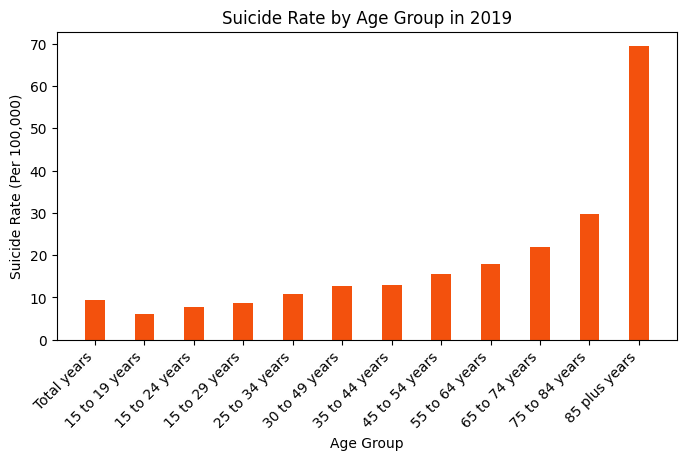

In [19]:
# SUICIDE RATE FOR EACH AGE GROUP IN 2019
cursor.execute("""
    SELECT dim_age, AVG(value_numeric) AS avg_numeric_value
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND dim_time = '2019'
    GROUP BY dim_age
    ORDER BY dim_age
""")

# Fetch the data into a DataFrame
df_age_2019 = pd.DataFrame(cursor.fetchall(), columns=['Age', 'Avg_Numeric_Value'])

# Plotting the bar chart
plt.figure(figsize=(8, 4))
plt.bar(df_age_2019['Age'], df_age_2019['Avg_Numeric_Value'], color='#f3510d', width=0.4)
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate by Age Group in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

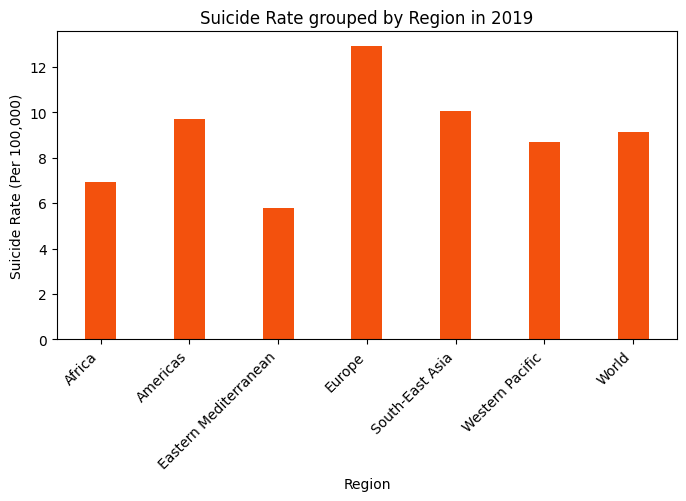

In [20]:
# SUICIDE RATES IN 2019 GROUPED BY REGION
cursor.execute("""
        SELECT geo_name_short, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND geo_name_short IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        AND dim_time = '2019'
        GROUP BY geo_name_short
        ORDER BY geo_name_short
    """)


# Fetch the data into a DataFrame
df_regions_2019 = pd.DataFrame(cursor.fetchall(), columns=['Region', 'Avg_Numeric_Value'])

# Plotting the bar chart
plt.figure(figsize=(8, 4))
plt.bar(df_regions_2019['Region'], df_regions_2019['Avg_Numeric_Value'], color='#f3510d', width=0.35)
plt.xlabel('Region')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate grouped by Region in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

4. Comparison charts for regions and income groups over the years.

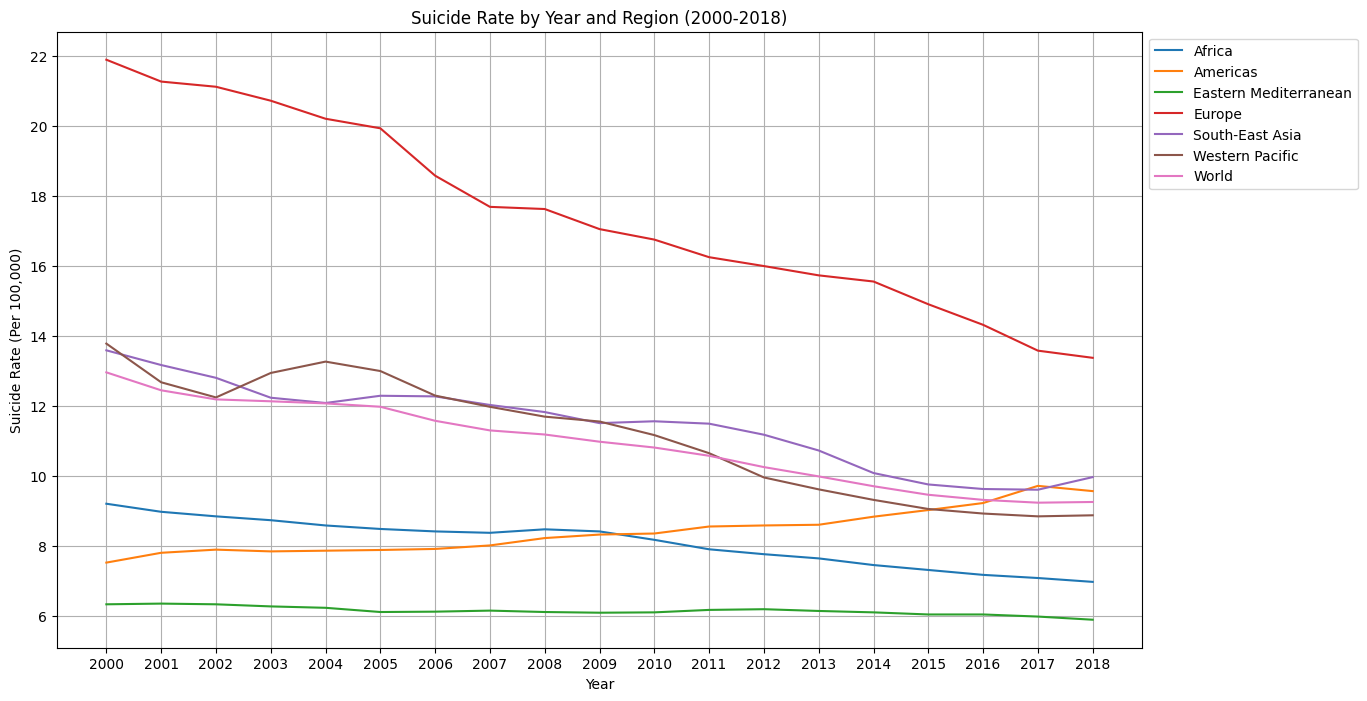

In [21]:
# SUICIDE RATE FROM 2000 TO 2019 BY
# Execute the query
cursor.execute("""
        SELECT dim_time, geo_name_short, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND geo_name_short IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        AND dim_age = 'Total years'
        AND dim_sex = 'Total'
        AND dim_time NOT IN ('2019')
        GROUP BY dim_time, geo_name_short
        ORDER BY dim_time, geo_name_short
    """)

# Commit the transaction
conn.commit()

# Fetch the data into a DataFrame
df_regions = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Region', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df_regions = df_regions.pivot(index='Year', columns='Region', values='Avg_Numeric_Value')

# Plotting the line plot
plt.figure(figsize=(14, 8))
for region in pivot_df_regions.columns:
    plt.plot(pivot_df_regions.index, pivot_df_regions[region], label=region)

plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate by Year and Region (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


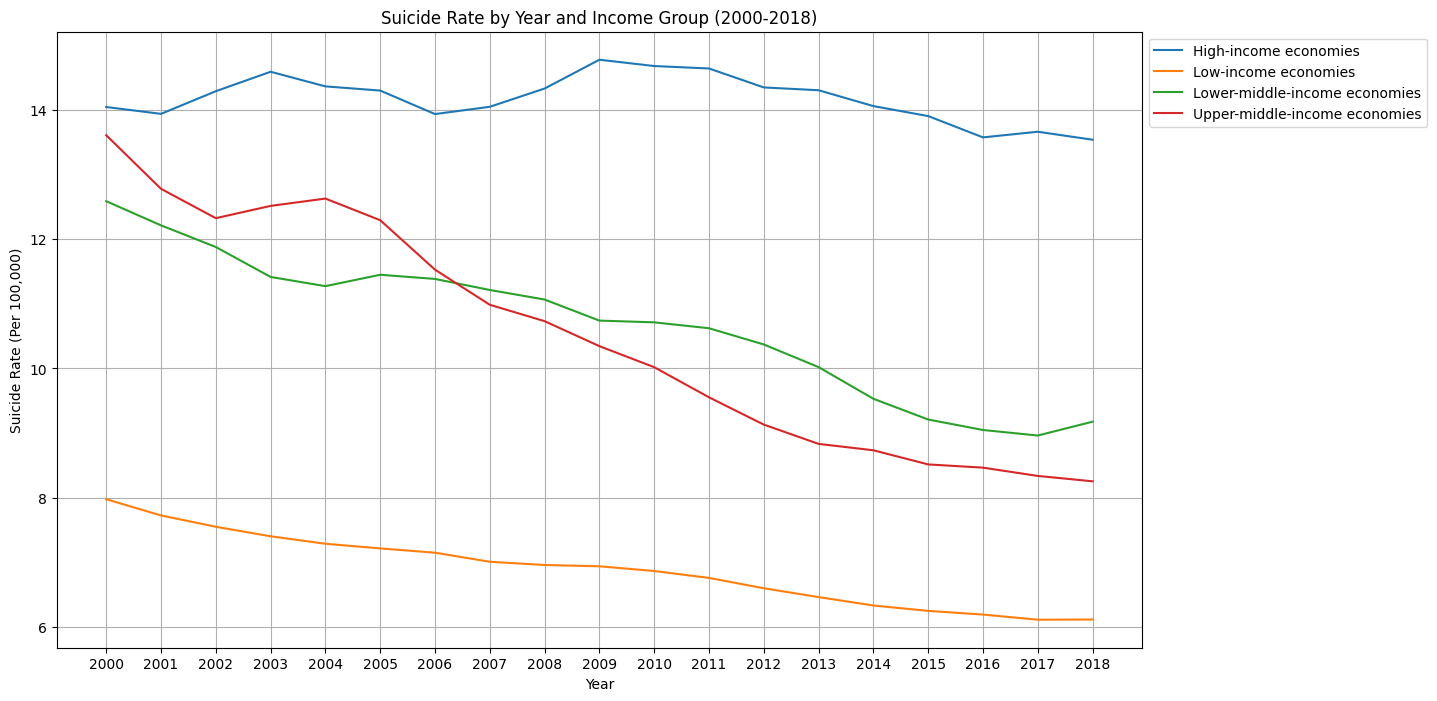

In [22]:
# INCOME GROUP SUICIDE RATE FROM 2000 TO 2019
# Execute the query
cursor.execute("""
        SELECT dim_time, geo_name_short, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND geo_name_short IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies')
        AND dim_time NOT IN ('2019')
        GROUP BY dim_time, geo_name_short
        ORDER BY dim_time, geo_name_short
    """)

# Commit the transaction
conn.commit()

# Fetch the data into a DataFrame
df_income_groups = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Income_Group', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df_income_groups = df_income_groups.pivot(index='Year', columns='Income_Group', values='Avg_Numeric_Value')

# Plotting the line plot
plt.figure(figsize=(14, 8))
for income_group in pivot_df_income_groups.columns:
    plt.plot(pivot_df_income_groups.index, pivot_df_income_groups[income_group], label=income_group)

plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rate by Year and Income Group (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


5. Top 10 list of countries with the highest suicide rates for each year from 2000 to 2019.

In [23]:
# TOP 10 COUNTRIES WITH HIGHEST SUICIDE RATES IN 2019
cursor.execute("""
    SELECT geo_name_short, AVG(value_numeric) AS avg_numeric_value
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND dim_time = '2019'
    AND geo_name_short NOT IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies')
    AND geo_name_short NOT IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
    GROUP BY geo_name_short
    ORDER BY avg_numeric_value DESC
""")

# Fetch the data into a DataFrame
df_countries_2019 = pd.DataFrame(cursor.fetchall(), columns=['Country', 'Avg_Numeric_Value'])

# Display the top 10 countries
print("Top 10 Countries with Highest Suicide Rates in 2019:")
print(df_countries_2019.head(10))

# Display the European countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands (Kingdom of the)', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

european_countries = ['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands (Kingdom of the)', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Tajikistan', 'TÃ¼rkiye', 'Turkmenistan', 'Ukraine', 'United Kingdom of Great Britain and Northern Ireland', 'Uzbekistan']
df_eu_countries = df_countries_2019[df_countries_2019['Country'].isin(eu_countries)]

print("\nCountries of the European Union with Suicide Rates in 2019:")
print(df_eu_countries)


Top 10 Countries with Highest Suicide Rates in 2019:
                    Country     Avg_Numeric_Value
0                   Lesotho  124.1201194444444444
1                  Eswatini   61.9572416666666667
2                    Guyana   60.8976388888888889
3                Mozambique   59.5120833333333333
4                  Zimbabwe   53.1394944444444444
5  Central African Republic   52.0125333333333333
6                  Suriname   46.0937277777777778
7            CÃ´te d'Ivoire   45.5682194444444444
8              Burkina Faso   41.8179666666666667
9                  Cameroon   41.2680055555555556

Countries of the European Union with Suicide Rates in 2019:
                          Country    Avg_Numeric_Value
38                      Lithuania  29.6364388888888889
51                         Latvia  23.0599305555555556
54                       Slovenia  22.5012222222222222
55                        Croatia  22.3397166666666667
59                        Hungary  21.2098777777777778
66    

In [24]:
# List for all countries that were ever in the top 10 from 2000-2019
all_top_countries = []

# Iterate over each year from 2000 to 2019
for year in range(2000, 2020):
    # SQL query for the top 10 countries of a specific year
    query = f"""
        SELECT geo_name_short, AVG(value_numeric) AS avg_numeric_value
        FROM suicide_data
        WHERE dim_value_type = 'RATE_PER_100000'
        AND dim_time = '{year}'
        AND geo_name_short NOT IN ('Low-income economies', 'Upper-middle-income economies', 'High-income economies', 'Lower-middle-income economies')
        AND geo_name_short NOT IN ('Africa', 'Europe', 'Eastern Mediterranean', 'World', 'Americas', 'Western Pacific', 'South-East Asia')
        GROUP BY geo_name_short
        ORDER BY avg_numeric_value DESC
        LIMIT 10
    """

    # Execute the query
    cursor.execute(query)

    # Fetch the data into a DataFrame
    df_top_countries = pd.DataFrame(cursor.fetchall(), columns=['Country', 'Avg_Numeric_Value'])

    # Add the year to the DataFrame
    df_top_countries['Year'] = year

    # Add the countries to the list of countries that were ever in the top 10
    all_top_countries.extend(df_top_countries['Country'].unique())

    # Display the top 10 countries for the current year
    print(f"\nTop 10 countries with the highest suicide rates in the year {year}:")
    print(df_top_countries[['Country', 'Avg_Numeric_Value']])

# Remove duplicate entries of countries in the list of countries that were ever in the top 10
all_top_countries = list(set(all_top_countries))
print("\nList of countries that were ever in the top 10 from 2000-2019:")
print(all_top_countries)



Top 10 countries with the highest suicide rates in the year 2000:
              Country    Avg_Numeric_Value
0  Russian Federation  55.5098666666666667
1           Lithuania  51.5409666666666667
2             Belarus  43.0649666666666667
3             Ukraine  40.4406666666666667
4          Kazakhstan  39.4245300000000000
5              Latvia  35.9957666666666667
6            Botswana  35.6399666666666667
7             Hungary  33.9649333333333333
8            Slovenia  32.1885666666666667
9            Kiribati  31.4302666666666667

Top 10 countries with the highest suicide rates in the year 2001:
              Country    Avg_Numeric_Value
0  Russian Federation  54.1432000000000000
1           Lithuania  48.5159000000000000
2             Belarus  44.6357000000000000
3          Kazakhstan  39.7333333333333333
4             Ukraine  37.9814000000000000
5            Botswana  34.8478666666666667
6              Guyana  34.7091333333333333
7              Latvia  33.3995333333333333
8     

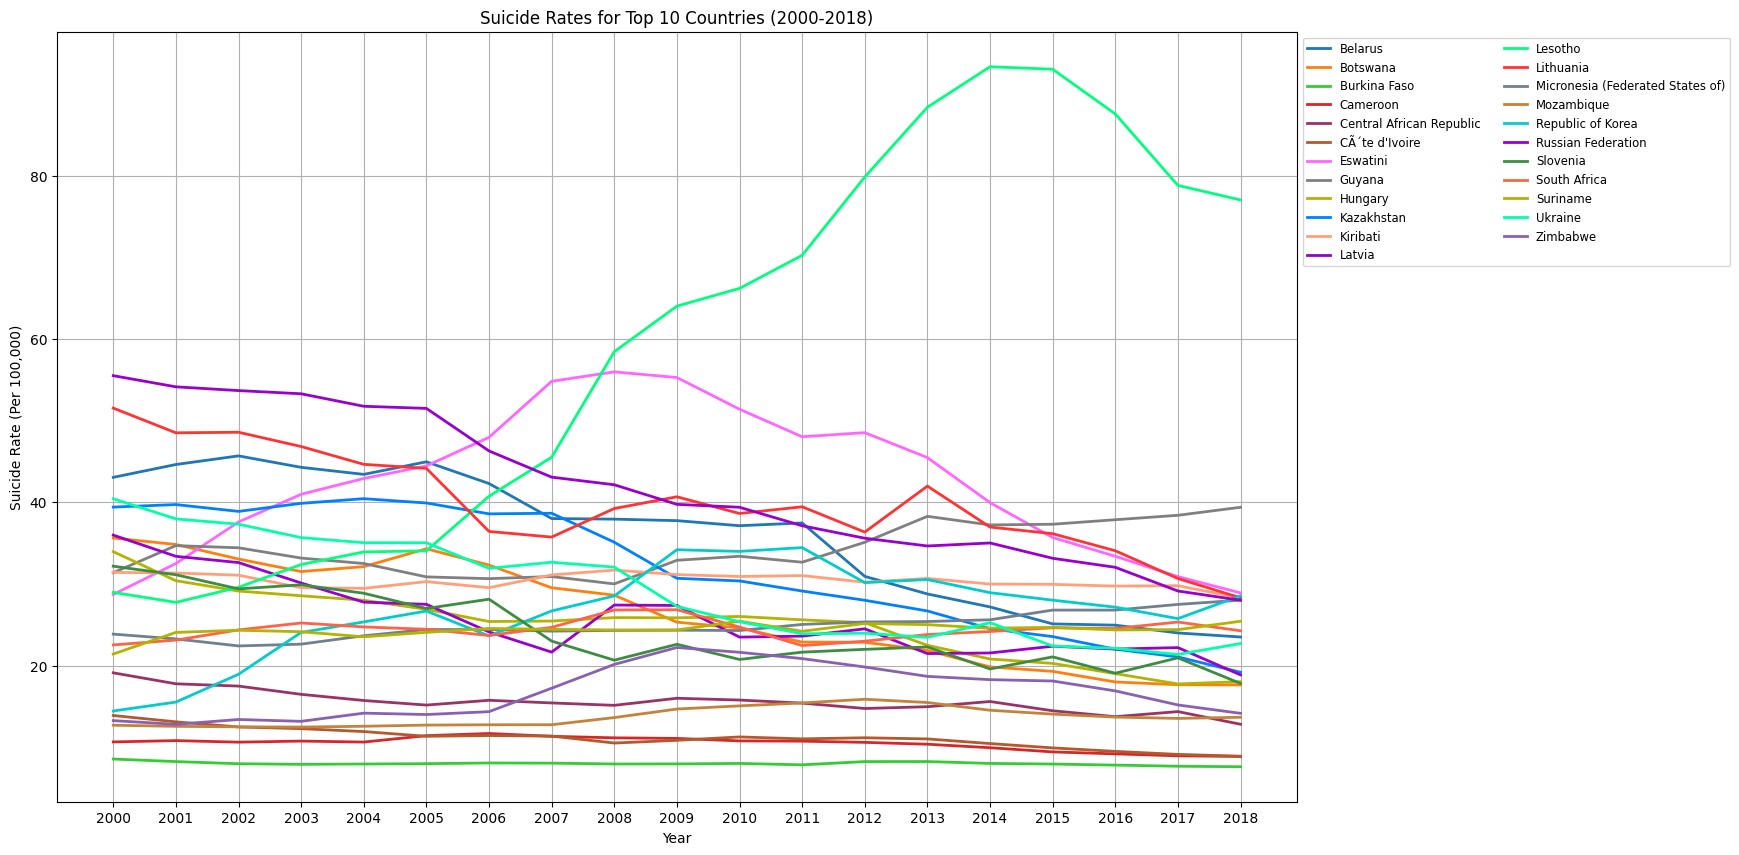

In [25]:
# SUICIDE RATES FOR TOP 10 COUNTRIES FROM 2000 TO 2019
cursor.execute("""
    SELECT dim_time, geo_name_short, AVG(value_numeric) AS avg_numeric_value
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND geo_name_short IN %s
    AND dim_time NOT IN ('2019')
    GROUP BY dim_time, geo_name_short
    ORDER BY dim_time, avg_numeric_value DESC
""", (tuple(all_top_countries),))

# Fetch the data into a DataFrame
df_top_countries_suicide_rates = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Country', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df_top_countries = df_top_countries_suicide_rates.pivot(index='Year', columns='Country', values='Avg_Numeric_Value')

# Define a list of distinct colors for each country
line_colors = ['#1f77b4', '#ff7f0e', '#33cc33', '#d62728', '#993366', '#b3592d', '#ff66ff', '#808080', '#b3b300', '#0080ff',
               '#FFA07A', '#9900cc', '#00FF7F', '#FF3333', '#708090', '#c4833a', '#00cccc', '#9900cc', '#3d8c42', '#FF6347',
               '#b3b300', '#00ffaa', '#8a60b0']


# Plotting the line plot
plt.figure(figsize=(16, 10))
for i, country in enumerate(pivot_df_top_countries.columns):
    plt.plot(pivot_df_top_countries.index, pivot_df_top_countries[country], label=country, linewidth=2, color=line_colors[i])

plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rates for Top 10 Countries (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.show()


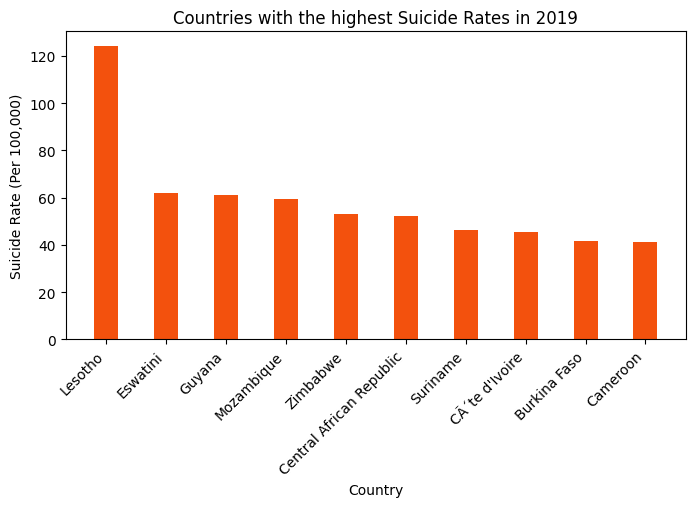

In [26]:
# TOP REGIONS WITH SUICIDE RATES IN 2019
cursor.execute("""
    SELECT geo_name_short AS Country, AVG(value_numeric) AS Avg_Suicide_Rate
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND dim_time = '2019'
    GROUP BY geo_name_short
    ORDER BY Avg_Suicide_Rate DESC
    LIMIT 10;
""")

# Fetch the data into a DataFrame
df_regions_2019 = pd.DataFrame(cursor.fetchall(), columns=['Region', 'Avg_Numeric_Value'])

# Plotting the bar chart
plt.figure(figsize=(8, 4))
plt.bar(df_regions_2019['Region'], df_regions_2019['Avg_Numeric_Value'], color='#f3510d', width=0.4)
plt.xlabel('Country')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Countries with the highest Suicide Rates in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()


6. Suicide rates for European Contries from 2000 to 2018

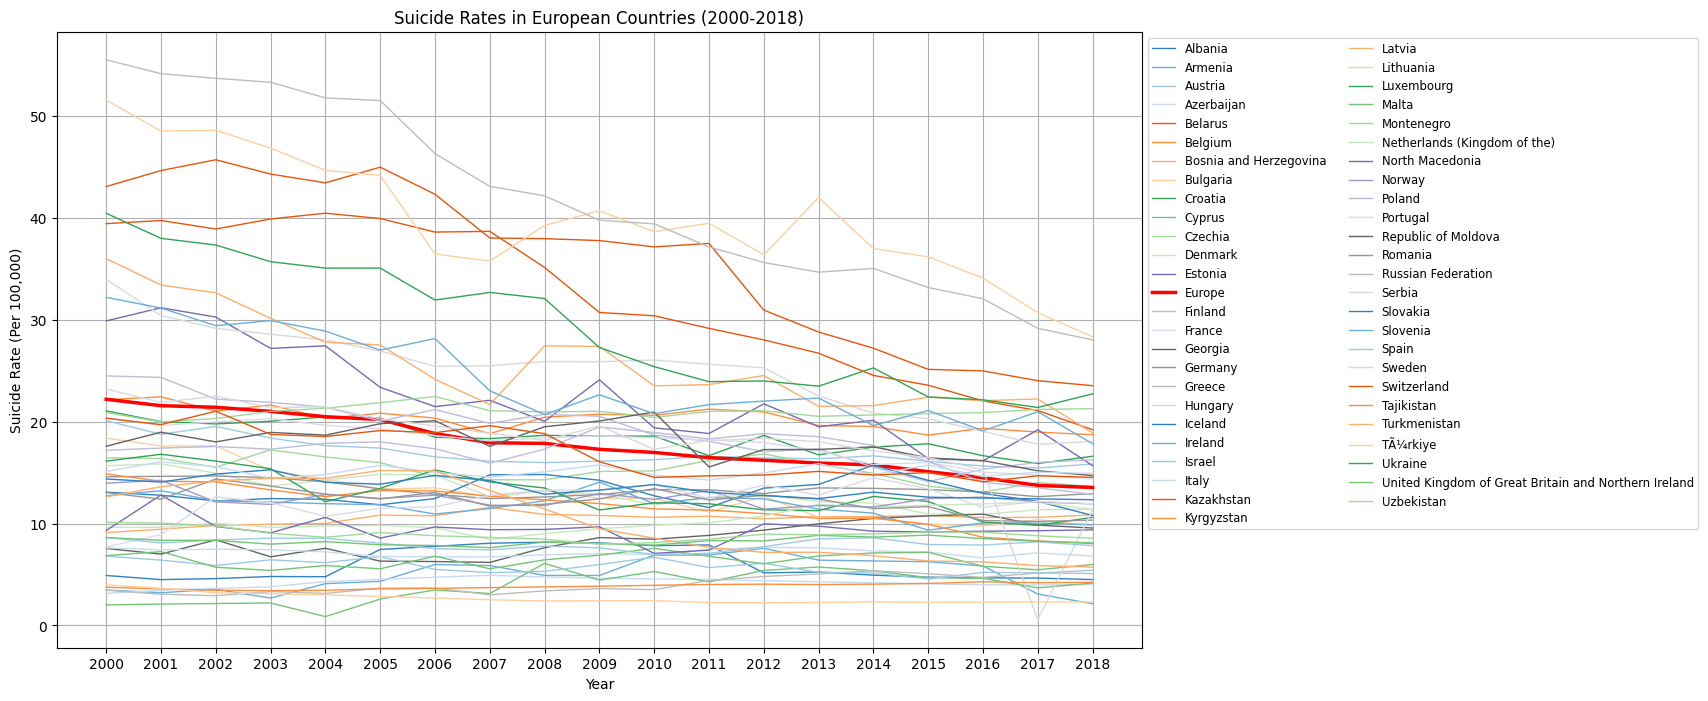

In [27]:
# SUICIDE RATES IN EUROPEAN COUNTRIES FROM 2000 TO 2018
cursor.execute("""
    SELECT dim_time, geo_name_short, AVG(value_numeric) AS avg_numeric_value
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND geo_name_short IN %s
    AND dim_time NOT IN ('2019')
    GROUP BY dim_time, geo_name_short
    ORDER BY dim_time, avg_numeric_value DESC
""", (tuple(['Europe'] + european_countries),))

# Fetch the data into a DataFrame
df_europe_suicide_rates = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Location', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df_europe = df_europe_suicide_rates.pivot(index='Year', columns='Location', values='Avg_Numeric_Value')

# Define colors with increased brightness for non-Europe locations
colors = plt.cm.tab20c.colors

# Plotting the line plot
plt.figure(figsize=(14, 8))
for i, location in enumerate(pivot_df_europe.columns):
    if location == 'Europe':
        color = 'red'  # Europe color in red
        linewidth = 2.5  # Europe line thicker
    else:
        color = tuple(colors[i % len(colors)])
        linewidth = 1.0  # Non-Europe lines regular thickness
    plt.plot(pivot_df_europe.index, pivot_df_europe[location], label=location, color=color, linewidth=linewidth)

plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rates in European Countries (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.show()


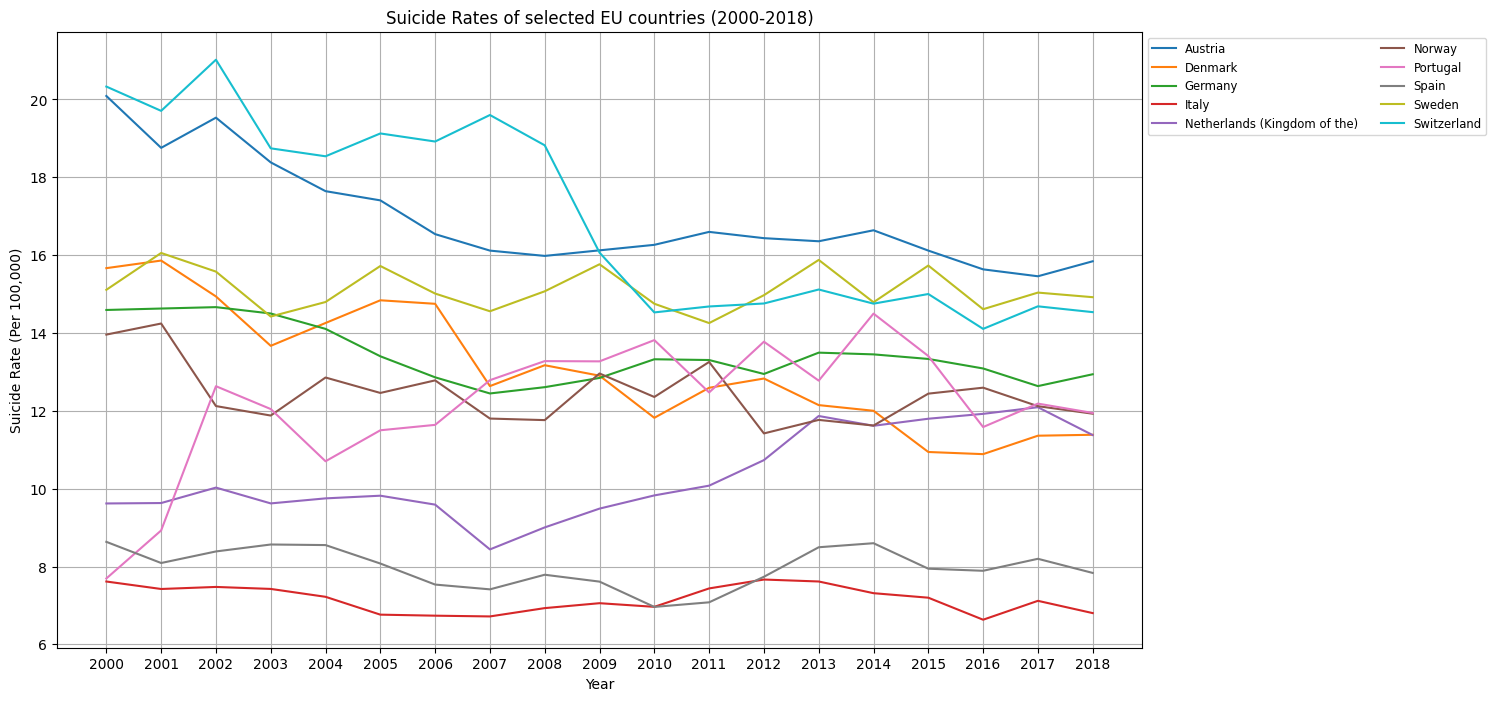

In [28]:
# SUICIDE RATES IN EUROPEAN COUNTRIES FROM 2000 TO 2018
imp_countries = ['Germany', 'Spain', 'Portugal', 'Italy', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Austria', 'Netherlands (Kingdom of the)']
cursor.execute("""
    SELECT dim_time, geo_name_short, AVG(value_numeric) AS avg_numeric_value
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND geo_name_short IN %s
    AND dim_time NOT IN ('2019')
    GROUP BY dim_time, geo_name_short
    ORDER BY dim_time, avg_numeric_value DESC
""", (tuple(imp_countries),))

# Fetch the data into a DataFrame
df_europe_suicide_rates = pd.DataFrame(cursor.fetchall(), columns=['Year', 'Location', 'Avg_Numeric_Value'])

# Pivot the DataFrame for better visualization
pivot_df_europe = df_europe_suicide_rates.pivot(index='Year', columns='Location', values='Avg_Numeric_Value')

# Define colors with increased brightness for non-Europe locations
colors = plt.cm.tab20c.colors

# Plotting the line plot
plt.figure(figsize=(14, 8))
for i, location in enumerate(pivot_df_europe.columns):
    plt.plot(pivot_df_europe.index, pivot_df_europe[location], label=location)

plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.title('Suicide Rates of selected EU countries (2000-2018)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.show()

7. Suicide Rates for all Countries for the years 2000, 2009 and 2019 subdevided by gender

In [29]:
# Suicide rates for all countries in 2000, 2009, and 2019
cursor.execute("""
    SELECT geo_name_short, dim_sex, dim_time, AVG(value_numeric) AS avg_suicide_rate
    FROM suicide_data
    WHERE dim_value_type = 'RATE_PER_100000'
    AND dim_time IN ('2000', '2009', '2019')
    GROUP BY geo_name_short, dim_sex, dim_time
    ORDER BY geo_name_short, dim_sex, dim_time
""")

# Fetch the data into a DataFrame
df_suicide_rates = pd.DataFrame(cursor.fetchall(), columns=['Country', 'Sex', 'Year', 'Suicide_Rate'])

# Pivot the DataFrame for better visualization
pivot_df = df_suicide_rates.pivot_table(index=['Country', 'Year'], columns='Sex', values='Suicide_Rate', aggfunc='mean').reset_index()

# Display the result
print("\nSuicide Rates per 100,000:")
print(pivot_df)



Suicide Rates per 100,000:
Sex      Country  Year   Female       Male      Total
0    Afghanistan  2000   4.7900   5.030000   4.910000
1    Afghanistan  2009   3.9700   4.780000   4.390000
2    Afghanistan  2019   8.2150   9.370833   8.776667
3         Africa  2000   4.9500  13.503000   9.210000
4         Africa  2009   4.5200  12.356600   8.420000
..           ...   ...      ...        ...        ...
577       Zambia  2009   4.8900  14.727600   9.750000
578       Zambia  2019  12.6050  67.076558  31.181667
579     Zimbabwe  2000  12.4446  14.147700  13.278000
580     Zimbabwe  2009  20.0846  24.465500  22.172500
581     Zimbabwe  2019  26.1125  87.506492  45.799492

[582 rows x 5 columns]


In [30]:
# Convert DataFrame to LaTeX table
latex_table = pivot_df.to_latex(index=False)

# Print LaTeX table
print(latex_table)

\begin{tabular}{llrrr}
\toprule
                                           Country & Year &    Female &       Male &      Total \\
\midrule
                                       Afghanistan & 2000 &  4.790000 &   5.030000 &   4.910000 \\
                                       Afghanistan & 2009 &  3.970000 &   4.780000 &   4.390000 \\
                                       Afghanistan & 2019 &  8.215000 &   9.370833 &   8.776667 \\
                                            Africa & 2000 &  4.950000 &  13.503000 &   9.210000 \\
                                            Africa & 2009 &  4.520000 &  12.356600 &   8.420000 \\
                                            Africa & 2019 &  3.270000 &  10.552200 &   6.900000 \\
                                           Albania & 2000 &  2.830000 &   6.960000 &   4.920000 \\
                                           Albania & 2009 &  6.030000 &  10.160300 &   8.110000 \\
                                           Albania & 2019 &  4.88083

C:\Users\tvogt\AppData\Local\Temp\ipykernel_23660\3583796049.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = pivot_df.to_latex(index=False)


In [31]:
# CLOSE CONNECTION
conn.close()